### Step 1: Load and inspect dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
# Load CSV file
games = pd.read_csv('data/games.csv')
mechanics = pd.read_csv('data/mechanics.csv')
user_ratings = pd.read_csv('data/user_ratings.csv')

In [46]:
# --- Display basic info ---
print("Games shape:", games.shape)
print("Mechanics shape:", mechanics.shape)
print("User Ratings shape:", user_ratings.shape)

Games shape: (21925, 48)
Mechanics shape: (21925, 158)
User Ratings shape: (18942215, 3)


In [59]:
# Games Dataset
# View column names and data types
games.info()

# Summary statistics
games.describe(include='all')

# Check for missing values
games.isnull().sum().sort_values(ascending=False).head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21925 entries, 0 to 21924
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BGGId                21925 non-null  int64  
 1   Name                 21925 non-null  object 
 2   Description          21924 non-null  object 
 3   YearPublished        21925 non-null  int64  
 4   GameWeight           21925 non-null  float64
 5   AvgRating            21925 non-null  float64
 6   BayesAvgRating       21925 non-null  float64
 7   StdDev               21925 non-null  float64
 8   MinPlayers           21925 non-null  int64  
 9   MaxPlayers           21925 non-null  int64  
 10  ComAgeRec            16395 non-null  float64
 11  LanguageEase         16034 non-null  float64
 12  BestPlayers          21925 non-null  int64  
 13  GoodPlayers          21925 non-null  object 
 14  NumOwned             21925 non-null  int64  
 15  NumWant              21925 non-null 

Family                 15262
LanguageEase            5891
ComAgeRec               5530
ImagePath                 17
Description                1
BGGId                      0
Rank:wargames              0
Kickstarted                0
Rank:boardgame             0
Rank:strategygames         0
Rank:abstracts             0
Rank:familygames           0
Rank:thematic              0
Rank:cgs                   0
Rank:childrensgames        0
dtype: int64

In [92]:
# Mechanics dataset
# Inspect mechanics dataset
mechanics.info()
mechanics.head(3)

# Check how many mechanics exist
print("Number of mechanics columns:", len(mechanics.columns) - 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21925 entries, 0 to 21924
Columns: 158 entries, BGGId to Physical
dtypes: int64(158)
memory usage: 26.4 MB
Number of mechanics columns: 157


In [77]:
# Inspect user ratings dataset
user_ratings.info()
user_ratings.head(3)

# Summary: number of unique users and games
print("Unique users:", user_ratings['Username'].nunique())
print("Unique games rated:", user_ratings['BGGId'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18942215 entries, 0 to 18942214
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   BGGId     int64  
 1   Rating    float64
 2   Username  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 433.6+ MB
Unique users: 411374
Unique games rated: 21925


### Step 2: Merge Relevant Datasets

#### 1.1. Merge Game and Mechanics Datasets

In [84]:
# Merge games and mechanics
games_mechanics_merged = games.merge(mechanics, on='BGGId', how='left')

# Verify merge
games_mechanics_merged.shape
games_mechanics_merged.head(3)

,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,...,Contracts,Passed Action Token,King of the Hill,Action Retrieval,Force Commitment,Rondel,Automatic Resource Growth,Legacy Game,Dexterity,Physical
0,1,Die Macher,die macher game seven sequential political rac...,1986,4.3206,7.61428,7.10363,1.57979,3,5,...,0,0,0,0,0,0,0,0,0,0
1,2,Dragonmaster,dragonmaster tricktaking card game base old ga...,1981,1.9630,6.64537,5.78447,1.45440,3,4,...,0,0,0,0,0,0,0,0,0,0
2,3,Samurai,samurai set medieval japan player compete gain...,1998,2.4859,7.45601,7.23994,1.18227,2,4,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# Aggregate user ratings to one row per game
user_ratings_agg = (
    user_ratings
    .groupby('BGGId')
    .agg({
        'Rating': 'mean',
        'Username': 'count'  #number of ratings
    })
    .rename(columns={'rating': 'avg_rating', 'user': 'num_ratings'})
    .reset_index()
)

#### 1.2. Merge games, mechanics, and user_ratings datasets

In [108]:
games_full = (
    games
    .merge(mechanics, on='BGGId', how='left')
    .merge(user_ratings_agg, on='BGGId', how='left')
)

# Verify merge
games_full.shape
games_full.head(3)

# Save merged dataframe to CSV
games_full.to_csv('games_full.csv', index=False)

### Step 3: Overview of Games Dataset

In [118]:
# Top 10 most owned games
top_owned = games.nlargest(10, 'NumOwned')[['Name', 'NumOwned', 'AvgRating']]
display(top_owned)

,Name,NumOwned,AvgRating
7919,Pandemic,166497,7.59130
12,Catan,165651,7.13746
673,Carcassonne,159709,7.41883
9861,7 Wonders,119235,7.73733
14811,Codenames,117959,7.60087
14450,7 Wonders Duel,108774,8.10730
8459,Dominion,106256,7.61081
4702,Ticket to Ride,104472,7.41494
14059,Terraforming Mars,99827,8.41879
11807,Love Letter,97734,7.23317


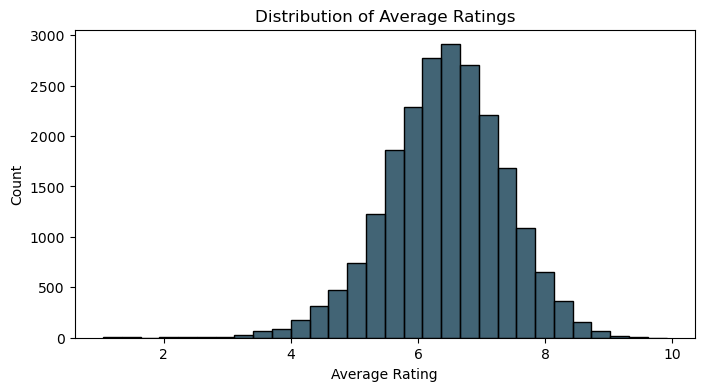

In [128]:
# Rating Distribution
plt.figure(figsize=(8,4))
sns.histplot(games['AvgRating'], bins=30, color="#023047ff")
plt.title("Distribution of Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Count")
plt.show()

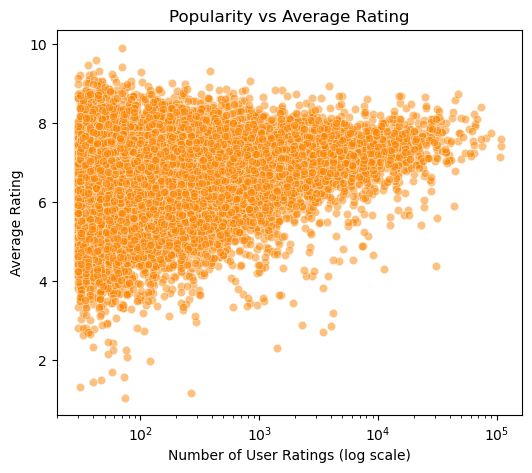

In [130]:
# Correlation between popularity and rating
plt.figure(figsize=(6,5))
sns.scatterplot(x='NumUserRatings', y='AvgRating', data=games, alpha=0.5, color="#fb8500ff")
plt.xscale('log')
plt.title("Popularity vs Average Rating")
plt.xlabel("Number of User Ratings (log scale)")
plt.ylabel("Average Rating")
plt.show()

### Step 4: Mechanics Dataset Exploration

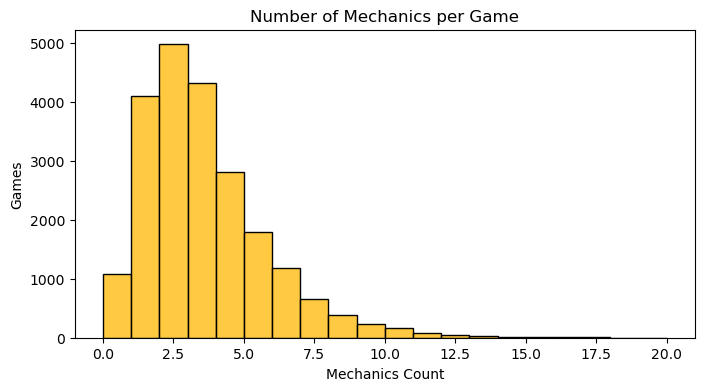

In [158]:
# Number of mechanics per game
mechanic_counts = mechanics.drop(columns='BGGId').sum(axis=1)
plt.figure(figsize=(8,4))
sns.histplot(mechanic_counts, bins=20, color="#ffb703ff")
plt.title("Number of Mechanics per Game")
plt.xlabel("Mechanics Count")
plt.ylabel("Games")
plt.show()

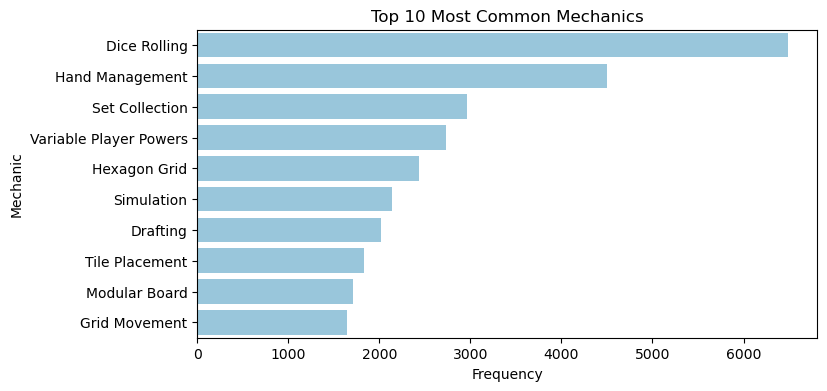

In [156]:
plt.figure(figsize=(8,4))
sns.barplot(
    x=top_mechanics.values,
    y=top_mechanics.index,
    color="#8ecae6ff"
)
plt.title("Top 10 Most Common Mechanics")
plt.xlabel("Frequency")
plt.ylabel("Mechanic")
plt.show()

### Step 5: User Ratings Overview

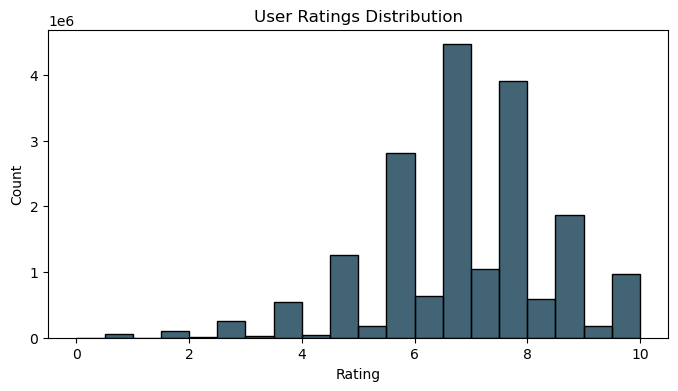

In [160]:
# Ratings distribution
plt.figure(figsize=(8,4))
sns.histplot(user_ratings['Rating'], bins=20, color="#023047ff")
plt.title("User Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

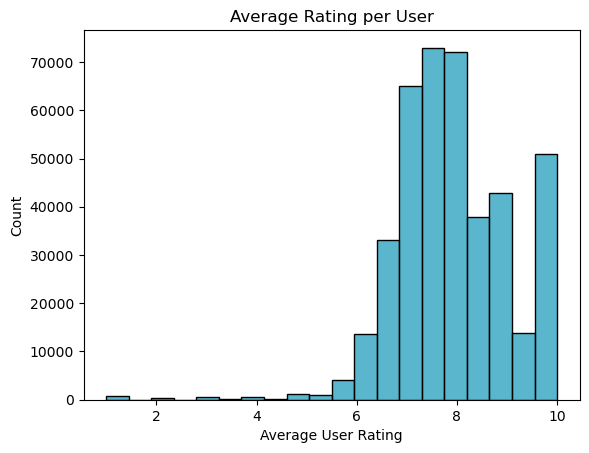

In [161]:
# Average rating per user (optional)
user_avg = user_ratings.groupby('Username')['Rating'].mean()
sns.histplot(user_avg, bins=20, color="#219ebcff")
plt.title("Average Rating per User")
plt.xlabel("Average User Rating")
plt.show()

### Step 6: Combine and Explore Relationships

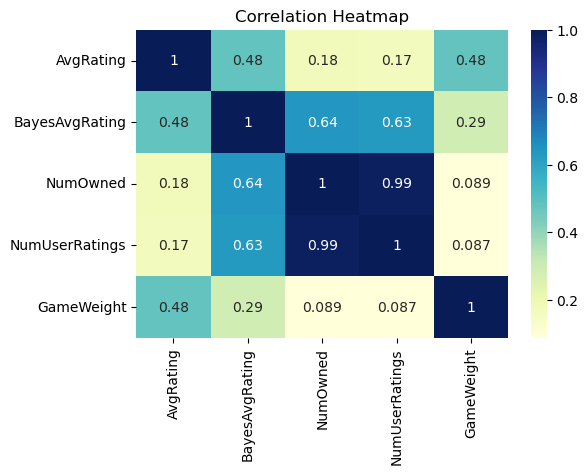

In [167]:
# Check correlation between features
numeric_cols = ['AvgRating', 'BayesAvgRating', 'NumOwned', 'NumUserRatings', 'GameWeight']
corr = games_full[numeric_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()